# Algebra Lineal

Nos estamos aproximando a estudiar modelos de Machine Learning. Estos modelos tienen como objetivo la extracción de información a partir de los datos, los cuales pueden ser representados como vectores y matrices, por lo que es necesario un recordar algunos conceptos de $\textbf{Algebra Lineal}$.

![Never](images/meme.jpg)


El Álgebra Lineal es una rama de las matemáticas que estudia los espacios vectoriales y las transformaciones lineales de estos espacios, tales como rotación, escalamiento, traslación, etc.



Créditos: Aurélien Géron (Hands-on Machine Learning with Scikit-learn and Tensorflow)

## Vectores

$\textbf{Definición:}$ Un vector es una cantidad definida por una magnitud y una dirección. Por ejemplo la velocidad de un pájaro es un vector tridimensional, cuya magnitud es la rapidez del vuelo y su dirección. Un vector puede ser representado por un arreglo de numeros llamados *escalares*. Cada escalar corresponde a la magnitud del vector a lo largo de caa una de sus dimensiones.

Por ejemplo, si un pajaro está volando a una velocidad de 13 km/h hacia el sur, 5 km/h hacia el este y 1 km/h hacia el cielo, podemos representar su velocidad mediante el siguiente vector:

**velocidad** $= \begin{pmatrix}
13 \\
5 \\
1 \\
\end{pmatrix}$


Nota: Por convención, los vectores son generalmente presentados en forma de columnas. Además, sus nombres se escriben generalmente en minuscula para distinguirlos de las matrices.

Un vector con 1 elemento puede ser representado como una flecha o un punto en sobre un eje, un vector de 2 elementos puede ser representado por un punto o una flecha en un plano y un vector de 3 elementos puede ser representado por un punto o una flecha en un espacio. Así, un vector N dimensional puede ser representado por un punto o una flecha en un espacio N-dimensional.



¿Por qué estamos interesados en los vectores?

En Machine Learning podemos representar observaciones y predicciones a través de vectores. Por ejemplo supongamos que queremos predecir si un correo corresponde a spam o no, basado en las observaciones que tenemos de él. Podemos representar dichas observaciones como:


**correo** $= \begin{pmatrix}
320 \\
0.8 \\
3 \\
\end{pmatrix}$


Este vector podría representar que tenemos un correo que tiene 320 palabras, el 80% de quienes lo leen lo arrojan a la papelera de reciclaje y posee 3 imágenes adjuntas.

Basado en este vector, podemos hacer que nuestro algoritmo prediga la probabilidad de que este correo corresponda a spam o no. Suponiendo que nuestro algoritmo arroja que existe un 86% de probabilidad de que corresponda a spam, nuestro vector de predicciones estaría dado por:

**class_probabilities** $= \begin{pmatrix}
0.86 \\
0.14 \\
\end{pmatrix}$

## Vectores en Python.

Es hora de empezar a ocupar nuestra herramienta estrella. Lo primero es saber cómo podemos representar un vector dentro de python y para ello tenemos varias opciones:

1. Una lista

In [1]:
vector = [1,2,3,4]
vector

[1, 2, 3, 4]

2. NumPy: Esta es una de las librerías de Python para realizar cálculos vectoriales de manera fácil y optimizada.

In [2]:
import numpy as np

vector = np.array([320, 0.8, 3])
vector

array([320. ,   0.8,   3. ])

Podemos obtener el tamaño de este vector con el atributo .shape

In [3]:
vector.shape

(3,)

el $i^{ésimo}$ elemento (llamado item) de un vector $\textbf{v}$ es denotado $\textbf{v}_i$.

Observación: En Python, la indexación comienza a partir del elemento 0. Por lo cual, si queremos obtener el tercer elemento del vector, tenemos que:

In [4]:
vector[0]

320.0

De manera de hacer este repaso de Álgebra Lineal más amigable y entendible, visualizaremos nuestras operaciones. Esto lo haremos a través de una de las herramientas de visualización más utilizadas de Python: matplotlib.

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

## Vectores bidimensionales

Empezaremos creando dos vectores 2D para visualizarlos.

In [6]:
u = np.array([2, 5])
v = np.array([3, 1])

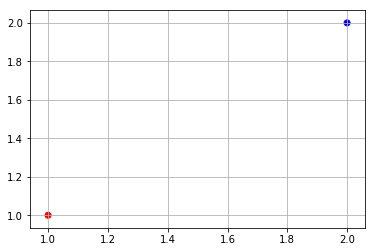

In [9]:
plt.scatter([1,2], [1,2], color=["r","b"])
plt.grid()

(2, 3) (5, 1)


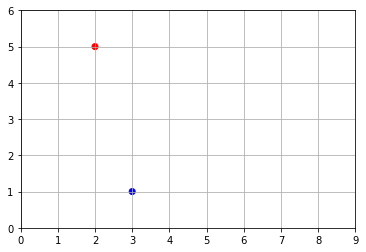

In [14]:
x_coords, y_coords = zip(u, v)
print(x_coords, y_coords)
plt.scatter(x_coords, y_coords, color=["r","b"])
plt.axis([0, 9, 0, 6])
plt.grid()
plt.show()

Como dijimos, los vectores también pueden ser representados como flechas. Matplotlib nos entrea una herramienta para dibujar flechas en un gráfico. Crearemos una función que nos retorne el gráfico de una flecha centrada en el origen.

In [11]:
def plot_vector2d(vector2d, origin=[0, 0], **options):
    return plt.arrow(origin[0], origin[1], vector2d[0], vector2d[1],
              head_width=0.2, head_length=0.3, length_includes_head=True, **options)

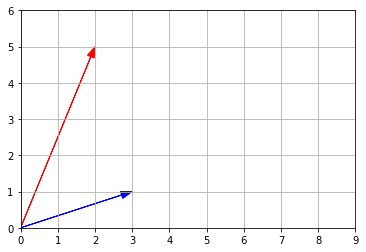

In [20]:
plot_vector2d(u, color="r")
plot_vector2d(v, color="b")
plt.axis([0, 9, 0, 6])
plt.grid()
plt.show()

## Vectores tridimensionales


In [21]:
a = np.array([1, 2, 8])
b = np.array([5, 6, 3])

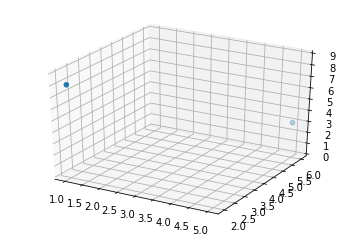

In [23]:
from mpl_toolkits.mplot3d import Axes3D

subplot3d = plt.subplot(111, projection='3d')
x_coords, y_coords, z_coords = zip(a,b)
subplot3d.scatter(x_coords, y_coords, z_coords)
subplot3d.set_zlim3d([0, 9])
plt.show()

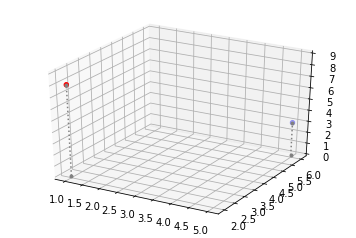

In [27]:
def plot_vectors3d(ax, vectors3d, z0, **options):
    for v in vectors3d:
        x, y, z = v
        ax.plot([x,x], [y,y], [z0, z], color="gray", linestyle='dotted', marker=".")
    x_coords, y_coords, z_coords = zip(*vectors3d)
    ax.scatter(x_coords, y_coords, z_coords, **options)

subplot3d = plt.subplot(111, projection='3d')
subplot3d.set_zlim([0, 9])
plot_vectors3d(subplot3d, [a,b], 0, color=("r","b"))
plt.show()

## Norma

La norma de un vector $\textbf{v}$ denotada como $\textbf{||v||}$, es la medida de la magnitud de $\textbf{v}$. El tipo de norma que discutiremos en este repaso será la norma Euclideana, la cual está definida como:

$|| \textbf{u} || = \sqrt{\sum_{i}{\textbf{u}_i}^2}$

In [29]:
def euclidean_norm(vector):
    squared_vector = [element**2 for element in vector]
    return sum(squared_vector)**0.5

print(euclidean_norm(u), euclidean_norm(v))

5.385164807134504 3.1622776601683795


NumPy tiene un modulo de Álgebra Lineal llamado `linalg`, el cual ofrece un método para calcular la norma llamado `norm`:

In [30]:
import numpy.linalg as LA
LA.norm(u)

5.385164807134504

¿Es esa la magnitud de u? Comprobémoslo con matplotlib.

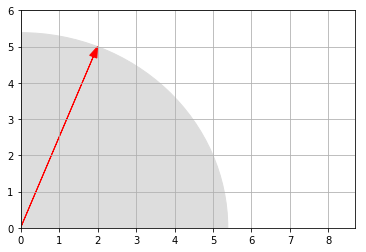

In [32]:
radius = LA.norm(u)
plt.gca().add_artist(plt.Circle((0,0), radius, color="#DDDDDD"))
plot_vector2d(u, color="red")
plt.axis([0, 8.7, 0, 6])
plt.grid()
plt.show()

## Adición

Dos vectores del mismo tamaño pueden ser sumados elemento a elemento.

In [33]:
print(" ", u)
print("+", v)
print("-"*10)
u + v

  [2 5]
+ [3 1]
----------


array([5, 6])

Text(2.4,2.5,'u+v')

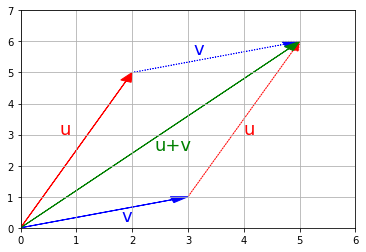

In [14]:
plot_vector2d(u, color="r")
plot_vector2d(v, color="b")
plot_vector2d(v, origin=u, color="b", linestyle="dotted")
plot_vector2d(u, origin=v, color="r", linestyle="dotted")
plot_vector2d(u+v, color="g")
plt.axis([0, 6, 0, 7])
plt.grid()
plt.text(0.7, 3, "u", color="r", fontsize=18)
plt.text(4, 3, "u", color="r", fontsize=18)
plt.text(1.8, 0.2, "v", color="b", fontsize=18)
plt.text(3.1, 5.6, "v", color="b", fontsize=18)
plt.text(2.4, 2.5, "u+v", color="g", fontsize=18)

$\textbf{Propiedades}$:

1. Conmutatividad: $\textbf{u} + \textbf{v} = \textbf{v} + \textbf{u}$

2. Asociatividad: $\textbf{u} + (\textbf{v} + \textbf{w}) = (\textbf{u} + \textbf{v}) + \textbf{w}$.


Si se tiene una figura definida por ciertos puntos (vectores) y se añade un vector $\textbf{v}$ a cada uno de esos puntos, la figura resultante estará trasladada por $\textbf{v}$. Esto se llama traslación geométrica.

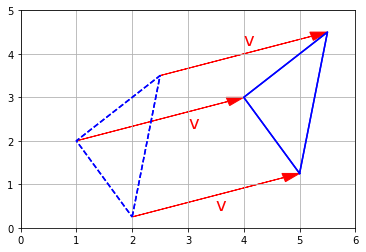

In [17]:
t1 = np.array([2, 0.25])
t2 = np.array([2.5, 3.5])
t3 = np.array([1, 2])

x_coords, y_coords = zip(t1, t2, t3, t1)
plt.plot(x_coords, y_coords, x_coords, y_coords,  linestyle='--', color='b')
plot_vector2d(v, t1, color="r")
plot_vector2d(v, t2, color="r")
plot_vector2d(v, t3, color="r")

t1b = t1 + v
t2b = t2 + v
t3b = t3 + v

x_coords_b, y_coords_b = zip(t1b, t2b, t3b, t1b)
plt.plot(x_coords_b, y_coords_b, x_coords_b, y_coords_b, linestyle='-', color='b')

plt.text(4, 4.2, "v", color="r", fontsize=18)
plt.text(3, 2.3, "v", color="r", fontsize=18)
plt.text(3.5, 0.4, "v", color="r", fontsize=18)

plt.axis([0, 6, 0, 5])
plt.grid()


## Multiplicación por un escalar

Cuando multiplicamos por un escalar, todos los elementos de nuestro vector serán multiplicados por este número.

In [64]:
print("2.5 * {} = {}".format(u, 2.5*u))

2.5 * [2 5] = [ 5.  12.5]


Gráficamente, la multiplicación por un escalar resulta en un cambio de escala en la figura (recordar "escalar"). Además, la distancia del vector respecto al origen también ser incrementada por este escalar.

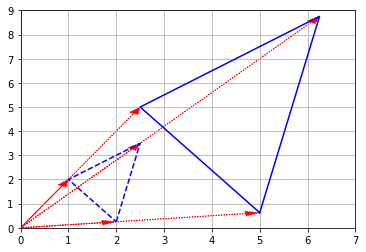

In [86]:
k = 2.5
t1c = t1 * k
t2c = t2 * k
t3c = t3 * k

x_coords, y_coords = zip(t1, t2, t3, t1)
plt.plot(x_coords, y_coords,  linestyle='--', color='b')
plot_vector2d(t1, color="r", linestyle=':')
plot_vector2d(t2, color="r", linestyle=':')
plot_vector2d(t3, color="r", linestyle=':')
plt.axis([0, 7, 0, 9])


plot_vector2d(t1 * k, color="r", linestyle=':')
plot_vector2d(t2 * k, color="r", linestyle=':')
plot_vector2d(t3 * k, color="r", linestyle=':')


x_coords, y_coords = zip(t1c, t2c, t3c, t1c)
plt.plot(x_coords, y_coords,  linestyle='-', color='b')
plt.grid()

$\textbf{Propiedades}$:

0. $\dfrac{\textbf{u}}{\lambda} = \dfrac{1}{\lambda} \times \textbf{u}$

1. Conmutatividad: $\lambda \times \textbf{u} = \textbf{u} \times \lambda$.

2. Asociatividad: $\lambda_1 \times (\lambda_2 \times \textbf{u}) = (\lambda_1 \times \lambda_2) \times \textbf{u}$.

3. Distributividad: $\lambda \times (\textbf{u} + \textbf{v}) = \lambda \times \textbf{u} + \lambda \times \textbf{v}$.

## Otros tipos de vectores:

1. Un vector-cero es un vector cuyos elementos son todos 0.

2. Un vector unitario es aquel cuya norma es igual a 1.

3. Un vector normalizado de un vector no nulo $\textbf{u}$, denotado como $\hat{\textbf{u}}$, es el vector unitario que apunta en la misma dirección de $\textbf{u}$. Se calcula en la forma: $\hat{\textbf{u}} = \frac{\textbf{u}}{||\textbf{u}||}$

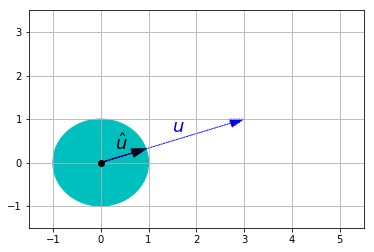

In [90]:
plt.gca().add_artist(plt.Circle((0,0),1,color='c'))
plt.plot(0, 0, "ko")
plot_vector2d(v / LA.norm(v), color="k")
plot_vector2d(v, color="b", linestyle=":")
plt.text(0.3, 0.3, "$\hat{u}$", color="k", fontsize=18)
plt.text(1.5, 0.7, "$u$", color="b", fontsize=18)
plt.axis([-1.5, 5.5, -1.5, 3.5])
plt.grid()
plt.show()

## Producto punto

$\textbf{Definición}$: El producto punto entre dos vectores $\textbf{u}$ y $\textbf{v}$ es una operación muy utilizada en algebra lineal. Su notación está dada por $\textbf{u} \cdot \textbf{v}$ y es definida como:


$\textbf{u} \cdot \textbf{v} = ||\textbf{u}|| \times ||\textbf{v}|| \times \cos{(\theta)}$, 

donde $\theta$ es el ángulo entre estos dos vectores. Otra manera de cálcular el producto punto es:

$\textbf{u} \cdot \textbf{v} = \sum_i{\textbf{u}_i \times \textbf{v}_i}$


Podemos implementarlo de una manera muy fácil en Python:

In [91]:
def dot_product(u,v):
    return sum(ui * vi for ui, vi in zip(u,v))

dot_product(u,v)

11

O simplemente utilizar la implementación del producto punto de NumPy utilizando la función `dot`:

In [92]:
np.dot(u,v)

11

$\textbf{Propiedades}$:

1. Conmutatividad: $\textbf{u} \cdot \textbf{v} = \textbf{v} \cdot \textbf{u}$.

2. La operación producto punto está definida para dos vectores. No hay manera de calcular el producto punto entre un escalar y un vector.

3. El producto punto $\textbf{NO}$ es asociativo: $\textbf{u} \cdot (\textbf{v} \cdot \textbf{w}) \neq (\textbf{u} \cdot \textbf{v}) \cdot \textbf{w}$.

4. El producto punto es asociativo respecto a un escalar en la forma: $\lambda \times (\textbf{u} \cdot \textbf{v}) = (\lambda \times \textbf{u}) \cdot \textbf{v} = \textbf{u} \cdot (\lambda \times \textbf{v})$.

5. Distributividad: $\textbf{u} \cdot (\textbf{v} + \textbf{w}) = \textbf{u} \cdot \textbf{v} + \textbf{u} \cdot \textbf{w}$.

## Angulo entre vectores:

Un posible uso del producto punto es el cálculo del ángulo entre dos vectores distintos de cero. Podemos encontrar en ángulo entre estos vectores a través de la formula:

$\theta = \arccos{\left ( \dfrac{\textbf{u} \cdot \textbf{v}}{\left \Vert \textbf{u} \right \| \times \left \Vert \textbf{v} \right \|} \right ) }$

$\textbf{Obs}$: Si $\textbf{u} \cdot \textbf{v} = 0$, entonces $\theta = \dfrac{\pi}{2} = 90º$. Entonces sigue que si el producto punto entre dos vectores no-nulos es cero, ellos son ortogonales.

Esto lo podemos implementar en Python:

In [95]:
def vector_angle(u, v):
    cos = np.dot(u,v)/(LA.norm(u)*LA.norm(v))
    return np.arccos(np.clip(cos, -1, 1))

theta = vector_angle(u,v)

print('El ángulo entre v y u medido es radianes es de: ', theta)
print('El ángulo entre v y u medido es grados es de: ', theta * 180/np.pi)


El ángulo entre v y u medido es radianes es de:  0.8685393952858896
El ángulo entre v y u medido es grados es de:  49.76364169072618


$\textbf{Obs}$: Debido al error que se puede producir cuando se tienen flotantes muy pequeños, los que hacen que $\cos$ caiga fuera del intervalo $[-1,1]$, tenemos que aplicar la función clip para hacer caer el valor de $\cos$ dentro del rango.

## Proyección Ortogonal.

El producto punto es muy útil para proyectar puntos dentro de un eje. La proyección del vector $\textbf{v}$ en el eje $\textbf{u}$ es dado por la fórmula:

$\textbf{proj}_{\textbf{u}}{\textbf{v}} = \dfrac{\textbf{u} \cdot \textbf{v}}{\left \Vert \textbf{u} \right \| ^2} \times \textbf{u}$

O equivalentemente:

$\textbf{proj}_{\textbf{u}}{\textbf{v}} = (\textbf{v} \cdot \hat{\textbf{u}}) \times \hat{\textbf{u}}$

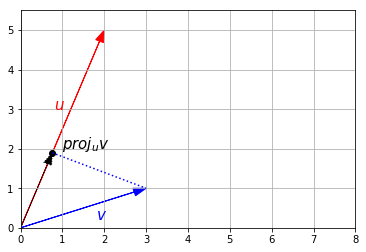

In [117]:
def projection(u, v):
    normalized_u = u / LA.norm(u)
    return np.dot(v, normalized_u) * normalized_u

proj = projection(u, v)

plot_vector2d(u, color="r")
plot_vector2d(v, color="b")


plot_vector2d(proj, color="k", linestyle=":")
plt.plot(proj[0], proj[1], "ko")
plt.plot([proj[0], v[0]], [proj[1], v[1]], ":", color='b')


plt.text(1, 2, "$proj_u v$", color="k", fontsize=15)
plt.text(1.8, 0.2, "$v$", color="b", fontsize=15)
plt.text(0.8, 3, "$u$", color="r", fontsize=15)

plt.axis([0, 8, 0, 5.5])
plt.grid()

## Matrices

Una matriz es un arreglo rectangular de escalares, dispuestos en filas y columnas:

$M = \begin{bmatrix} 10 & 20 & 30 \\ 40 & 50 & 60 \end{bmatrix}$


Una matriz puede ser vista como una lista de vectores.

Las matrices son eficientes porque podemos operar con muchos vectores al mismo tiempo. Veremos además que las matrices son muy convenientes a la hora de realizar transformaciones lineales tales como escalamiento, rotación y traslación. 


En Python podemos representar las matrices de dos formas:

1. Como una lista de listas:

In [116]:
[
    [10, 20, 30],
    [40, 50, 60]
]

[[10, 20, 30], [40, 50, 60]]

O más eficientemente, a través de NumPy, la cual provee una implementación muy eficiente a la hora de operar con matrices.

In [18]:
M = np.array([
    [10, 20, 30],
    [40, 50, 60]
    ])

M

array([[10, 20, 30],
       [40, 50, 60]])

## Tamaño

El tamaño de una matriz está definidia por la cantidad de filas y columnas de ésta. Esto lo notaremos como $Filas \times Columnas$. Por ejemplo la matriz M es una matriz de $2 \times 3$

In [120]:
M.shape

(2, 3)

## Indexación:

El número ubicado en la $i^{ésima}$ fila y $j^{ésima}$ columna de una matriz $\textbf{X}$, es comúnmente denotada por $\textbf{x}_{ij}$. Esto quiere decir que la matriz $\textbf{X}$ está compuesta por los elementos:


$X = \begin{bmatrix}
  x_{1,1} & x_{1,2} & x_{1,3} & \cdots & x_{1,n}\\
  x_{2,1} & x_{2,2} & x_{2,3} & \cdots & x_{2,n}\\
  x_{3,1} & x_{3,2} & x_{3,3} & \cdots & x_{3,n}\\
  \vdots & \vdots & \vdots & \ddots & \vdots \\
  x_{m,1} & x_{m,2} & x_{m,3} & \cdots & x_{m,n}\\
\end{bmatrix}$

$\textbf{Obs}$: A pesar de que matemáticamente el primer elemento de una matriz está denotado por $\textbf{x}_{1,1}$, hay que recordar que la indexación en Python comienza desde 0. Entonces, si queremos acceder al elemento $\textbf{m}_{2,3}$, debiesemos acceder de la forma:

In [19]:
M[0,0]

10

Se puede además acceder a la $i^{ésima}$ fila de una matriz, denotada por $\textbf{M}_{i,*}$ de la siguiente forma:

In [123]:
M[1,:] #Segunda fila.

array([40, 50, 60])

Podemos acceder a la $j^{ésima}$ columna de una matriz, denotada por $\textbf{M}_{*,j}$ de la siguiente forma:

In [126]:
M[:,2] #tercera columna.

array([30, 60])

Podemos acceder a más de una columna a la vez a través de la indexación de la siguiente forma:

In [129]:
M[:, 1:3] #Esto es, acceder desde la columna 2 a la 4 (excluyendo la 4).

array([[20, 30],
       [50, 60]])

## Tipos de matrices:



1. $\textbf{Matriz cuadrada}$: Posee el mismo número de filas como de columnas.

\begin{bmatrix}
  4 & 9 & 2 \\
  3 & 5 & 7 \\
  8 & 1 & 6
\end{bmatrix}

2. $\textbf{Matriz triangular superior}$: Los elementos bajo la diagonal tienen valor 0.

\begin{bmatrix}
  4 & 9 & 2 \\
  0 & 5 & 7 \\
  0 & 0 & 6
\end{bmatrix}


3. $\textbf{Matriz triangular inferior}$: Los elementos sobre la diagonal tienen valor 0.

\begin{bmatrix}
  4 & 0 & 0 \\
  3 & 5 & 0 \\
  8 & 1 & 6
\end{bmatrix}

4. $\textbf{Matriz diagonal}$: Es una matriz triangular superior e inferior.

\begin{bmatrix}
  4 & 0 & 0 \\
  0 & 5 & 0 \\
  0 & 0 & 6
\end{bmatrix}



Podemos construir matrices diagonales utilizando NumPy:

In [130]:
np.diag([1,2,3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

Además podemos obtener la diagonal de una matriz utilizando la misma función:

In [131]:
D = np.array([
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9],
    ])
np.diag(D)

array([1, 5, 9])

5. $\textbf{Matriz Identidad}$: Una matriz identidad de tamaño $n$ denotada como $I_{n}$, es una matriz diagonal de tamaño $n \times n$ con 1's en la diagonal. Por ejemplo:

$  I_{3} = 
\begin{bmatrix}
  1 & 0 & 0 \\
  0 & 1 & 0 \\
  0 & 0 & 1
\end{bmatrix} $

Podemos obtener una matriz identidad en NumPY a través de la función `eye`.

In [132]:
I_3 = np.eye(3)
I_3

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## Adición

Si dos matrices Q y R tienen el mismo tamaño $m \times n$, pueden ser sumadas. La adición de matrices se realia elemento a elemento y su resultado es una matriz de tamaño $m \times n$ donde: $S_{i,j} = Q_{i,j} + R_{i,j}$

$S =
\begin{bmatrix}
  Q_{11} + R_{11} & Q_{12} + R_{12} & Q_{13} + R_{13} & \cdots & Q_{1n} + R_{1n} \\
  Q_{21} + R_{21} & Q_{22} + R_{22} & Q_{23} + R_{23} & \cdots & Q_{2n} + R_{2n}  \\
  Q_{31} + R_{31} & Q_{32} + R_{32} & Q_{33} + R_{33} & \cdots & Q_{3n} + R_{3n}  \\
  \vdots & \vdots & \vdots & \ddots & \vdots \\
  Q_{m1} + R_{m1} & Q_{m2} + R_{m2} & Q_{m3} + R_{m3} & \cdots & Q_{mn} + R_{mn}  \\
\end{bmatrix}$


Por ejemplo:

In [21]:
A = np.array([[10,20,30], [40, 50, 60]])
B = np.array([[1,2,3], [4, 5, 6]])
print(A)
print(B)

[[10 20 30]
 [40 50 60]]
[[1 2 3]
 [4 5 6]]


In [137]:
A+B

array([[11, 22, 33],
       [44, 55, 66]])

$\textbf{Propiedades}$:

1. $\textbf{Conmutatividad}$: $A + B = B + A$


2. $\textbf{Asociatividad}$: $A + (B + C) = (A + B) + C$

## Multiplicación Escalar

La multiplicación de una matriz por un escalar se realiza elemento a elemento dentro de la matriz de la siguiente forma:


$\lambda M =
\begin{bmatrix}
  \lambda \times M_{11} & \lambda \times M_{12} & \lambda \times M_{13} & \cdots & \lambda \times M_{1n} \\
  \lambda \times M_{21} & \lambda \times M_{22} & \lambda \times M_{23} & \cdots & \lambda \times M_{2n} \\
  \lambda \times M_{31} & \lambda \times M_{32} & \lambda \times M_{33} & \cdots & \lambda \times M_{3n} \\
  \vdots & \vdots & \vdots & \ddots & \vdots \\
  \lambda \times M_{m1} & \lambda \times M_{m2} & \lambda \times M_{m3} & \cdots & \lambda \times M_{mn} \\
\end{bmatrix}$



En NumPy basta con utilizar el operador `*`

In [138]:
3 * A 

array([[ 30,  60,  90],
       [120, 150, 180]])

$\textbf{Propiedades}$:

1. $\textbf{Conmutatividad}$: $ \alpha A = A \alpha$


2. $\textbf{Asociatividad}$: $\alpha (\beta A) = (\alpha \times \beta) A$


3. $\textbf{Distributividad}$: $\alpha (A + B) = \alpha A + \alpha B$

In [139]:
2 * (3 * A)

array([[ 60, 120, 180],
       [240, 300, 360]])

In [140]:
(2 * 3) * A

array([[ 60, 120, 180],
       [240, 300, 360]])

## Multiplicación de matrices

Una matriz A de tamaño $m \times n$, puede ser multiplicada por una matriz B de tamaño $n \times q$. El resultado es una matriz C cuyos elementos son calculados como la suma de sus productos:

$P_{i,j} = \sum_{k=1}^n{Q_{i,k} \times R_{k,j}}$

Así, P está dado por: 

$P =
\begin{bmatrix}
Q_{11} R_{11} + Q_{12} R_{21} + \cdots + Q_{1n} R_{n1} &
  Q_{11} R_{12} + Q_{12} R_{22} + \cdots + Q_{1n} R_{n2} &
    \cdots &
      Q_{11} R_{1q} + Q_{12} R_{2q} + \cdots + Q_{1n} R_{nq} \\
Q_{21} R_{11} + Q_{22} R_{21} + \cdots + Q_{2n} R_{n1} &
  Q_{21} R_{12} + Q_{22} R_{22} + \cdots + Q_{2n} R_{n2} &
    \cdots &
      Q_{21} R_{1q} + Q_{22} R_{2q} + \cdots + Q_{2n} R_{nq} \\
  \vdots & \vdots & \ddots & \vdots \\
Q_{m1} R_{11} + Q_{m2} R_{21} + \cdots + Q_{mn} R_{n1} &
  Q_{m1} R_{12} + Q_{m2} R_{22} + \cdots + Q_{mn} R_{n2} &
    \cdots &
      Q_{m1} R_{1q} + Q_{m2} R_{2q} + \cdots + Q_{mn} R_{nq}
\end{bmatrix}$


Notar que cada elemento $P_{i,j}$ es el producto punto entre el vector fila $Q_{i,*}$ y el vector columna $R_{*,j}$, entonces podemos calcular cada elemento como:

$P_{i,j} = Q_{i,*} \cdot R_{*,j}$

La multiplicación de dos matrices en NumPy puede ser realizada utilizando el método `dot`:

$E = AD = \begin{bmatrix}
  10 & 20 & 30 \\
  40 & 50 & 60
\end{bmatrix} 
\begin{bmatrix}
  2 & 3 & 5 & 7 \\
  11 & 13 & 17 & 19 \\
  23 & 29 & 31 & 37
\end{bmatrix} = 
\begin{bmatrix}
  930 & 1160 & 1320 & 1560 \\
  2010 & 2510 & 2910 & 3450
\end{bmatrix}$

In [22]:
A * B

array([[ 10,  40,  90],
       [160, 250, 360]])

In [149]:
D = np.array([
        [ 2,  3,  5,  7],
        [11, 13, 17, 19],
        [23, 29, 31, 37]
    ])
E = np.dot(A,D)
E

array([[ 930, 1160, 1320, 1560],
       [2010, 2510, 2910, 3450]])

$\textbf{Propiedades}$:

1. $\textbf{NO Conmutatividad}$: $ AB \neq BA$


2. $\textbf{Asociatividad}$: $A(BC) = (AB)C$


3. $\textbf{Distributividad en adición}$: $(A + B) C = AC + BC$

In [147]:
np.dot(D,A)

ValueError: shapes (3,4) and (2,3) not aligned: 4 (dim 1) != 2 (dim 0)

In [150]:
F = np.array([
        [8,  7,  4,  2],
        [2,  5,  1,  0],
        [9, 11, 17, 21],
        [0,  1,  0,  1]])

np.dot(E,F)

array([[21640, 28390, 27320, 31140],
       [47290, 62080, 60020, 68580]])

In [154]:
np.dot(A, np.dot(D,F))

array([[21640, 28390, 27320, 31140],
       [47290, 62080, 60020, 68580]])

$\textbf{Observación}$: El operador `*` realiza una multiplicación elemento a elemento, no es una multiplicación de matrices.

In [155]:
A * B

array([[ 10,  40,  90],
       [160, 250, 360]])

## Transposición

La transpuesta de una matriz $M$ (denotada por $M^{T}$), es una matriz tal que la $i^{ésima}$ fila de M, corresponde a la $i^{ésima}$ columna de $M^{T}$.

$ A^T =
\begin{bmatrix}
  10 & 20 & 30 \\
  40 & 50 & 60
\end{bmatrix}^T =
\begin{bmatrix}
  10 & 40 \\
  20 & 50 \\
  30 & 60
\end{bmatrix}$

O en otras palabras: ($A^T)_{i,j}$ = $A_{j,i}$

En NumPy, podemos transponer una matriz utilizando el atributo `T`:

In [156]:
A

array([[10, 20, 30],
       [40, 50, 60]])

In [157]:
A.T

array([[10, 40],
       [20, 50],
       [30, 60]])

In [158]:
A.T.T

array([[10, 20, 30],
       [40, 50, 60]])

Una matriz simétrica es aquella en que $M = M^{T}$. Por definición, esta matriz debe ser cuadrada.

$\textbf{Observación}$: El producto punto de una matriz por su transpuesta es siempre simétrica.

In [161]:
np.dot(F, F.T)

array([[133,  55, 259,   9],
       [ 55,  30,  90,   5],
       [259,  90, 932,  32],
       [  9,   5,  32,   2]])

In [162]:
np.dot(F, F.T).T

array([[133,  55, 259,   9],
       [ 55,  30,  90,   5],
       [259,  90, 932,  32],
       [  9,   5,  32,   2]])

In [26]:
T = np.array([
        [8,  7,  4,  2],
        [2,  5,  1,  0],
        [9, 11, 17, 21],
        [0,  1,  0,  1]])

T.T

array([[ 8,  2,  9,  0],
       [ 7,  5, 11,  1],
       [ 4,  1, 17,  0],
       [ 2,  0, 21,  1]])

## Convirtiendo vectores 1D a 2D con NumPy.

En NumPy, cuando tenemos vectores 1D, realmente tenemos una dimensión, por lo cual no tenemos vectores fila o columna. Por lo cual, si queremos convertir un vector $\textbf{u}$ en una fila, tenemos dos formas de hacerlo:

In [27]:
u

array([2, 5])

In [28]:
u.T

array([2, 5])

In [165]:
u_row = np.array([u])
u_row

array([[2, 5]])

Otra opción es añadir un nuevo eje:

In [166]:
u[np.newaxis, :]

array([[2, 5]])

Ahora somos capaces de transponer un vector fila:

In [167]:
u_column = u_row.T
u_column

array([[2],
       [5]])

Otra manera de obtener un vector columna es añadiendo un nuevo eje en las columnas:

In [168]:
u[:, np.newaxis]

array([[2],
       [5]])

## Graficando una matriz


Si queremos darle una representación gráfica a una matriz, podemos pensar en que estas son listas de vectores. Por esto, podemos tomar cada uno de estos vectores y graficarlos como vectores independientes. Por ejemplo, si queremos graficar una matriz de $2 \times 4$:

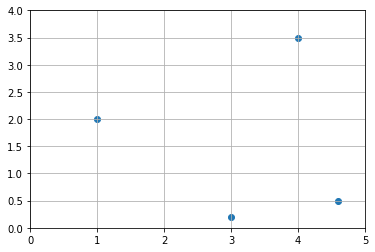

In [29]:
P = np.array([
        [3.0, 4.0, 1.0, 4.6],
        [0.2, 3.5, 2.0, 0.5]
    ])
x_coords_P, y_coords_P = P
plt.scatter(x_coords_P, y_coords_P)
plt.axis([0, 5, 0, 4])
plt.grid()

$\textbf{Observación}$: Podríamos haber almacenado nuestros 4 vectores bidimensionales como una matriz de $4 \times 2$ ($P^{T}$).

Como en las matrices los vectores están ordenados en posiciones específicas, podemos verlos como caminos, pudiendo representarla como puntos conectados:

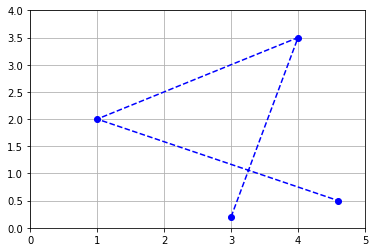

In [170]:
plt.plot(x_coords_P, y_coords_P, "bo")
plt.plot(x_coords_P, y_coords_P, "b--")
plt.axis([0, 5, 0, 4])
plt.grid()


También podemos representarlas como polígonos:

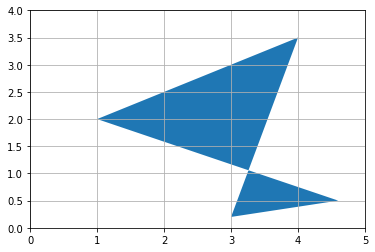

In [32]:
from matplotlib.patches import Polygon
plt.gca().add_artist(Polygon(P.T))
plt.axis([0, 5, 0, 4])
plt.grid()


## Adición de matrices

La adición en matrices puede ser vista como multiples traslaciones geométricas.


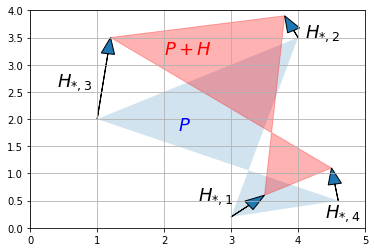

In [173]:
H = np.array([
        [ 0.5, -0.2, 0.2, -0.1],
        [ 0.4,  0.4, 1.5, 0.6]
    ])
P_moved = P + H

plt.gca().add_artist(Polygon(P.T, alpha=0.2))
plt.gca().add_artist(Polygon(P_moved.T, alpha=0.3, color="r"))
for vector, origin in zip(H.T, P.T):
    plot_vector2d(vector, origin=origin)

plt.text(2.2, 1.8, "$P$", color="b", fontsize=18)
plt.text(2.0, 3.2, "$P+H$", color="r", fontsize=18)
plt.text(2.5, 0.5, "$H_{*,1}$", color="k", fontsize=18)
plt.text(4.1, 3.5, "$H_{*,2}$", color="k", fontsize=18)
plt.text(0.4, 2.6, "$H_{*,3}$", color="k", fontsize=18)
plt.text(4.4, 0.2, "$H_{*,4}$", color="k", fontsize=18)

plt.axis([0, 5, 0, 4])
plt.grid()


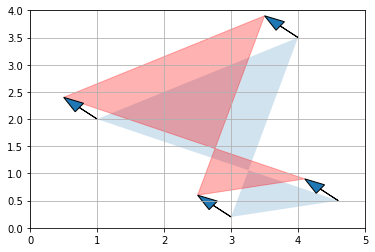

In [174]:
H2 = np.array([
        [-0.5, -0.5, -0.5, -0.5],
        [ 0.4,  0.4,  0.4,  0.4]
    ])
P_translated = P + H2

plt.gca().add_artist(Polygon(P.T, alpha=0.2))
plt.gca().add_artist(Polygon(P_translated.T, alpha=0.3, color="r"))
for vector, origin in zip(H2.T, P.T):
    plot_vector2d(vector, origin=origin)

plt.axis([0, 5, 0, 4])
plt.grid()
plt.show()

## Multiplicación Escalar

La multiplicación de una matriz por un escalar, al igual que con los vectores, resulta en una reescalación de la figura. Entonces supongamos que queremos reescalar una matriz por un factor de 0.6:

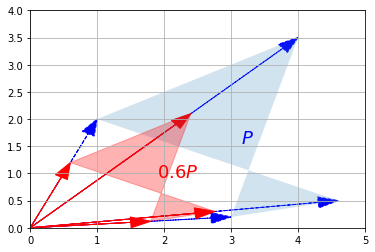

In [33]:
def plot_transformation(P_before, P_after, text_before, text_after, axis = [0, 5, 0, 4], arrows=False):
    if arrows:
        for vector_before, vector_after in zip(P_before.T, P_after.T):
            plot_vector2d(vector_before, color="blue", linestyle="--")
            plot_vector2d(vector_after, color="red", linestyle="-")
    plt.gca().add_artist(Polygon(P_before.T, alpha=0.2))
    plt.gca().add_artist(Polygon(P_after.T, alpha=0.3, color="r"))
    plt.text(P_before[0].mean(), P_before[1].mean(), text_before, fontsize=18, color="blue")
    plt.text(P_after[0].mean(), P_after[1].mean(), text_after, fontsize=18, color="red")
    plt.axis(axis)
    plt.grid()

P_rescaled = 0.60 * P
plot_transformation(P, P_rescaled, "$P$", "$0.6 P$", arrows=True)
plt.show()

## Producto punto: Proyección en un eje.

Esta es una de las herramientas más utiles, pero al mismo tiempo más difíciles de visualizar. Partiremos por un caso simple en el cual tenemos una matriz de tamaño $1 \times 2$, definida por: $U = \begin{bmatrix} 1 & 0 \end{bmatrix}$. 

In [39]:
U = np.array([[1, 0]])

In [40]:
np.dot(U,P)

array([[3. , 4. , 1. , 4.6]])

Estas son las coordenadas horizontales del vector P: proyección de P sobre el eje horizontal.

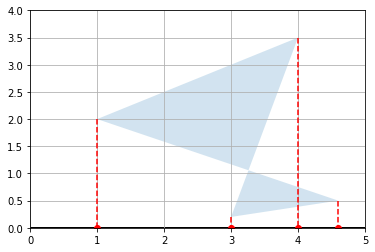

In [41]:
def plot_projection(U, P):
    U_P = U.dot(P)
    
    axis_end = 100 * U
    plot_vector2d(axis_end[0], color="black")

    plt.gca().add_artist(Polygon(P.T, alpha=0.2))
    for vector, proj_coordinate in zip(P.T, U_P.T):
        proj_point = proj_coordinate * U
        plt.plot(proj_point[0][0], proj_point[0][1], "ro")
        plt.plot([vector[0], proj_point[0][0]], [vector[1], proj_point[0][1]], "r--")

    plt.axis([0, 5, 0, 4])
    plt.grid()
    plt.show()

plot_projection(U, P)

Podemos proyectar esta matriz dentro de cualquier otro eje, reemplazando $U$ por cualqueir otro vector unitario. Por ejemplo, si queremos proyectar la matriz en un eje que tiene una inclinación de $30º$ respecto al eje horizontal:



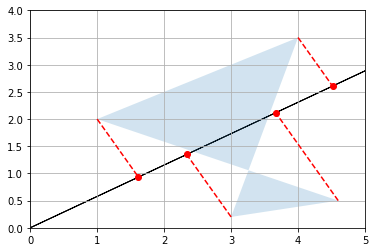

In [42]:
angle30 = 30 * np.pi / 180  # angle in radians
U_30 = np.array([[np.cos(angle30), np.sin(angle30)]])

plot_projection(U_30, P)

## Rotación

Vamos a crear una matriz $V$ de tamaño $2 \times 2$, que contiene dos vectores unitarios que forman un ángulo de $30º$ y $120º$ respecto al eje horizontal.

$V = \begin{bmatrix} \cos(30°) & \sin(30°) \\ \cos(120°) & \sin(120°) \end{bmatrix}$

In [43]:
angle120 = 120 * np.pi / 180
V = np.array([
        [np.cos(angle30), np.sin(angle30)],
        [np.cos(angle120), np.sin(angle120)]
    ])
V

array([[ 0.8660254,  0.5      ],
       [-0.5      ,  0.8660254]])

In [44]:
np.dot(V,P)

array([[ 2.69807621,  5.21410162,  1.8660254 ,  4.23371686],
       [-1.32679492,  1.03108891,  1.23205081, -1.8669873 ]])

La primera fila corresponde a las coordenadas de la proyección de P en el eje de $30º$. La segunda fila corresponde a las coordenadas de la proyeccción de P en el eje de $120º$. Finalmente obtenemos las coordenadas de P después de rotar el eje vertical y horizontal en $30º$ respecto al origen.

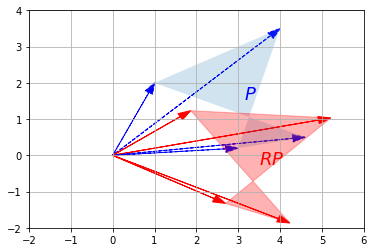

In [45]:
P_rotated = V.dot(P)
plot_transformation(P, P_rotated, "$P$", "$RP$", [-2, 6, -2, 4], arrows=True)
plt.show()

## Matriz inversa

La matriz inversa de una matriz $A$, denotada por $A^{-1}$ es aquella que cumple con la siguiente propiedad: 

$A * A^{-1} = I$

Podemos calcular la inversa de una matriz (si es que existe) a través de la función `inv` de `linalg` de la siguiente forma:

In [48]:
import numpy.linalg as LA

inv_V = LA.inv(V)

In [49]:
np.dot(V, inv_V).astype('uint')

array([[1, 0],
       [0, 1]], dtype=uint64)

La matriz inversa representa una forma de volver desde una transformación a la transformación inicial. De esta forma, podemos volver desde la matriz rotada $P\_rotated$ hacia  $P$ a través de la matriz inversa $inv\_V$

In [50]:
p_unrotated = np.dot(inv_V, P_rotated)

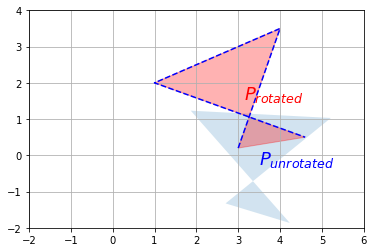

In [52]:
plot_transformation(P_rotated, p_unrotated, "$P_{unrotated}$", "$P_{rotated}$",[-2, 6, -2, 4])
plt.plot(P[0], P[1], "b--")


## Determinante

El determinante de una matriz cuadrada $A$ (denotado por $\det(A)$ o $|A|$) es un valor que puede ser calculado a través de sus elementos. Una de las maneras más simples de calcularla es utilizando la siguiente recursividad: 

$|M| = M_{1,1}\times|M^{(1,1)}| - M_{2,1}\times|M^{(2,1)}| + M_{3,1}\times|M^{(3,1)}| - M_{4,1}\times|M^{(4,1)}| + \cdots ± M_{n,1}\times|M^{(n,1)}|$


Por ejemplo, el determinante de la siguiente matriz de tamaño $3 \times 3$:

$M = \begin{bmatrix}
  1 & 2 & 3 \\
  4 & 5 & 6 \\
  7 & 8 & 0
\end{bmatrix}$

Puede ser calculado como:


$|M| = 1 \times \left | \begin{bmatrix} 5 & 6 \\ 8 & 0 \end{bmatrix} \right |
     - 2 \times \left | \begin{bmatrix} 4 & 6 \\ 7 & 0 \end{bmatrix} \right |
     + 3 \times \left | \begin{bmatrix} 4 & 5 \\ 7 & 8 \end{bmatrix} \right |$


$\left | \begin{bmatrix} 5 & 6 \\ 8 & 0 \end{bmatrix} \right | = 5 \times 0 - 6 \times 8 = -48$

$\left | \begin{bmatrix} 4 & 6 \\ 7 & 0 \end{bmatrix} \right | = 4 \times 0 - 6 \times 7 = -42$

$\left | \begin{bmatrix} 4 & 5 \\ 7 & 8 \end{bmatrix} \right | = 4 \times 8 - 5 \times 7 = -3$

Y así podemos calcular el resultado final:

$|M| = 1 \times (-48) - 2 \times (-42) + 3 \times (-3) = 27$


El determinante podemos calculando utilizando la función `det` implementada en `linalg`:

In [230]:
M = np.array([
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 0]
    ])
LA.det(M)

27.0

El determinante puede ser utilizado para saber si una matriz es invertible o no.
Una matriz es invertible si $\det(A) \neq 0$.

## Autovalores y autovectores

Un **autovector** de una matriz cuadrada $M$ es un vector no-nulo que permanece en la misma linea después de una transformación lineal asociada a $M$. Formalmente, es un vector $v$ tal que:

$M \cdot v = \lambda \times v$

Donde $\lambda$ es un valor escalar llamado **autovalor** asociado al vector $v$.


Otra definición puede ser: Las transformaciones lineales rotan y escalan a los vectores, pero solo escalan a los autovectores. Este escalamiento del autovector es proporcional a su autovalor.

Por ejemplo:

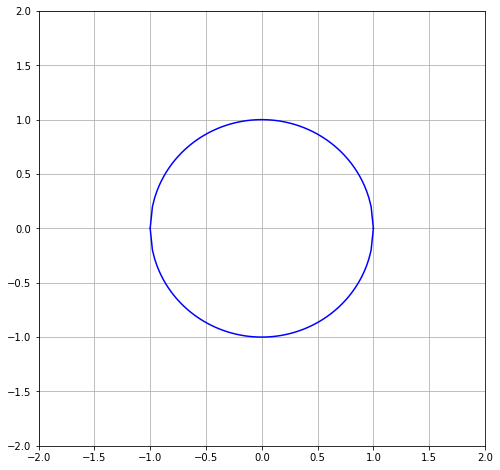

In [283]:
x = np.linspace(-1,1,100)
y1 = np.sqrt(1-x**2)
y2 = -1 * y1

plt.figure(figsize=(8,8))
plt.plot(x,y1, 'b')
plt.plot(x,y2, 'b')
plt.axis([-2,2,-2,2])
plt.grid()

Definimos una transformación que está dada por la siguiente matriz:

$M = \begin{bmatrix}
9 & 4  \\
4 & 3 
\end{bmatrix}$
    

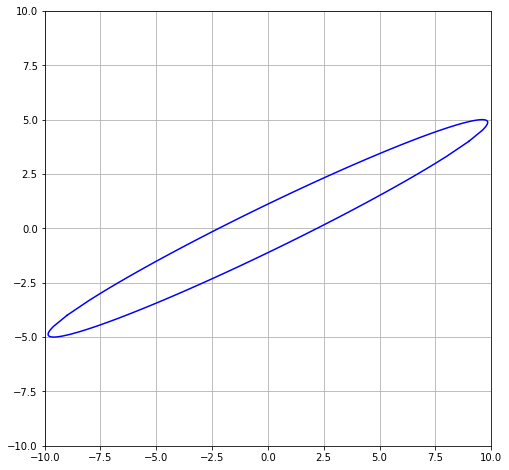

In [286]:
def transformation(x,y):
    return 9*x + 4*y, 4*x + 3*y

x_new1, y_new1 = transformation(x, y1)
x_new2, y_new2 = transformation(x, y2)

plt.figure(figsize=(8,8))
plt.plot(x_new1,y_new1, 'b')
plt.plot(x_new2,y_new2, 'b')
plt.axis([-10,10,-10,10])
plt.grid()

In [288]:
eigen_val, eigen_vect = LA.eig(np.array([[9,4],[4,3]]))

print('Eigen value: ', eigen_val)
print('Eigen vetor: ', eigen_vect)

Eigen value:  [11.  1.]
Eigen vetor:  [[ 0.89442719 -0.4472136 ]
 [ 0.4472136   0.89442719]]


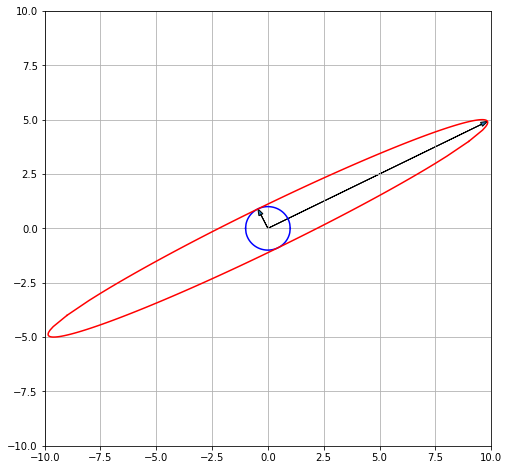

In [306]:
soa = np.array([
                 eigen_val[0] * eigen_vect[0][0],
                 eigen_val[0] * eigen_vect[1][0]])

soa1 = np.array([
                 eigen_val[1] * eigen_vect[0][1],
                 eigen_val[1] * eigen_vect[1][1]])

plt.figure(figsize=(8,8))
plt.plot(x,y1, 'b')
plt.plot(x,y2, 'b')
plt.plot(x_new1,y_new1, 'r')
plt.plot(x_new2,y_new2, 'r')

plot_vector2d(soa, origin=[0,0])
plot_vector2d(soa1, origin=[0,0])

plt.axis([-10,10,-10,10])
plt.grid()

Gracias.


Cualquier duda o consulta: maperezc@udec.cl